C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blob

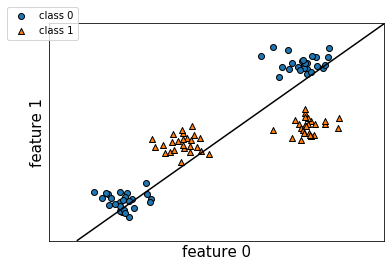

In [2]:
from mglearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from mglearn.plots import plot_2d_separator
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

plot_2d_separator(linear_svm, X, fill=False)

marker_set = ['o', '^']

for i, m in zip(np.unique(y), marker_set):
    plt.scatter(X[y==i][:, 0], X[y==i][:, 1], marker=m,
                label='class {}'.format(i), edgecolors='k')
    
plt.legend(bbox_to_anchor=(0.1, 1.1), fancybox=True)
plt.xlabel('feature 0', size=15)
plt.ylabel('feature 1', size=15)
plt.show()

In [3]:
# 선형적으로 구분되지 않을 경우 -> Kernel SVM 사용
# SVM에서 데이터를 고차원 공간에 매핑하는 방법
# 1. 원래의 특성 조합 계산
# 2. RBF 커널 ~ 가우시안 커널 사용

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


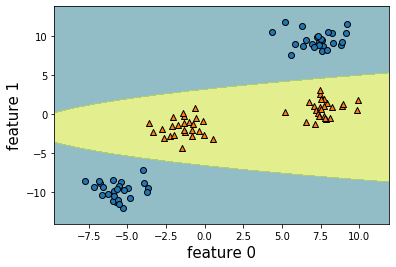

In [4]:
# 1. 원래의 특성 조합 계산
# 선 하나로 구분되지 않는 데이터를 분석하기 위해 수학적 방법으로 차수를 하나 늘려
# 비선형 데이터축 추가

X_new = np.hstack([X, X[:, 1:]**2])

linear_svm_3d = LinearSVC().fit(X_new, y)

xx = np.linspace(X[:, 0].min() - 2, X[:, 0].max() + 2, num=50)
yy = np.linspace(X[:, 1].min() - 2, X[:, 1].max() + 2, num=50)

XX, YY = np.meshgrid(xx, yy)
ZZ = YY**2

params = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
dec = linear_svm_3d.decision_function(params)
plt.contourf(XX, YY, dec.reshape(XX.shape),
             levels=[dec.min(), 0, dec.max()],
             alpha=0.5)

for i, m in zip(np.unique(y), marker_set):
    plt.scatter(X[y==i][:, 0], X[y==i][:, 1], marker=m, edgecolors='k')

plt.xlabel('feature 0', size=15)
plt.ylabel('feature 1', size=15)
plt.show()

In [5]:
# 그리드 탐색
# 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도

# SVM의 경우 -> 커널의 폭(gamma), 규제 매개변수(C)가 중요
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


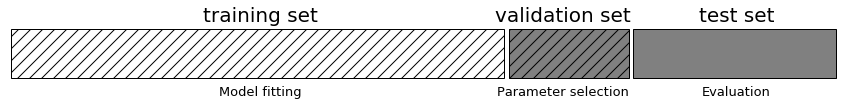

In [6]:
# train_test_split을 이용한 iris 데이터
import mglearn
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글폰트
plt.rcParams['axes.unicode_minus'] = False # 축 -

mglearn.plots.plot_threefold_split()
plt.show()

In [7]:
# train_test_split 1번
X_trainvalid, X_test, y_trainvalid, y_test =\
    train_test_split(iris.data, iris.target, random_state=0)

# train_test_split 2번
X_train, X_valid, y_train, y_valid =\
    train_test_split(X_trainvalid, y_trainvalid, random_state=0)


print('X_train size: {}'.format(X_train.shape))
print('X_valid size: {}'.format(X_valid.shape))
print('X_test size: {}'.format(X_test.shape))

# best_score = 0
# values = [0.001, 0.01, 0.1, 1, 10, 100]

# for g in values:
#     for c in values:
#         svc = SVC(gamma=g, C=c).fit(X_train, y_train)
#         score = svc.score(X_test, y_test)
        
#         if score > best_score:
#             best_score = score
#             best_parameter = { 'C': c, 'gamma': g }
            
# print('best score ==> {:.3f}'.format(best_score))
# print('best parameter ==> {}'.format(best_parameter))

X_train size: (84, 4)
X_valid size: (28, 4)
X_test size: (38, 4)


In [8]:
# grid search
values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_score = 0

for g in values:
    for c in values:
        svc = SVC(C=c, gamma=g).fit(X_train, y_train)
        scores = svc.score(X_valid, y_valid) # 검증세트로 svc 평가
        
        if scores > best_score:
            best_score = scores
            best_param = {'C':c, 'gamma':g}
        
svc = SVC(**best_param).fit(X_trainvalid, y_trainvalid) # **kwargs: 딕셔너리 형태로 함수에 인자
score_svc = svc.score(X_test, y_test) # 테스트세트로 svc 평가
                          
print('최적 매개변수 점수 ==> {:.3f}'.format(best_score))
print('최적 매개변수 ==> {}'.format(best_param))
print('최적 매개변수 test ==> {:.3f}'.format(score_svc))

최적 매개변수 점수 ==> 1.000
최적 매개변수 ==> {'C': 100, 'gamma': 0.001}
최적 매개변수 test ==> 0.974


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


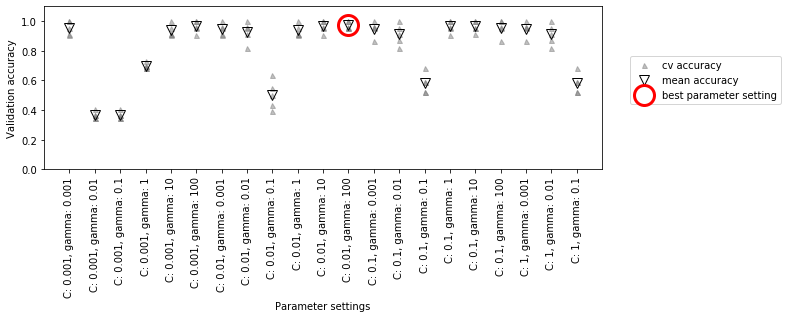

In [9]:
# cross-validation을 이용한 iris 데이터의 grid search
import mglearn

mglearn.plots.plot_cross_val_selection()
plt.show()

In [10]:
# [0.001, 0.01, 0.1, 1, 10, 100, 1000]를 C와 gamma로 각각 설정한 후,
# cross-validation 에 한개씩, 모두 5개의 값을 계산
# 총 6 x 6 x 5 = 180개의 모델 검정
from sklearn.model_selection import KFold, cross_val_score

X_train, X_test, y_train, y_test =\
    train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# grid search
values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_score = 0

for g in values:
    for c in values:
        svc = SVC(gamma=g, C=c).fit(X_train, y_train)
        kfold = KFold(n_splits=5, shuffle=True, random_state=0)
        scores = cross_val_score(svc, X_train, y_train, cv=kfold)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_param = {'gamma': g, 'C': c}
            
svc = SVC(**best_param).fit(X_train, y_train)

print('최적 매개변수 점수 ==> {:.3f}'.format(best_score))
print('최적 매개변수 ==> {}'.format(best_param))
print('최적 매개변수에서 test ==> {:.3f}'.format(svc.score(X_test, y_test)))

최적 매개변수 점수 ==> 0.981
최적 매개변수 ==> {'gamma': 0.001, 'C': 1000}
최적 매개변수에서 test ==> 0.978


In [11]:
# cross-validation을 이용한 grid search
# -> GridSearchCV
# -> 딕셔너리 형태로 검색 대상 매개변수를 지정하여 필요한 모든 모델을 학습
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# data load
iris = load_iris()

# data parition
x_train, x_test, y_train, y_test = \
  train_test_split(iris.data, iris.target, random_state=0, test_size=0.3)

# create object
svc = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'gamma': values, 'C': values} # GridSearchCV의 딕셔너리 생성

grid_search = GridSearchCV(svc, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

score = grid_search.score(X_test, y_test)

print('GridSearchCV를 이용한 최적 매개변수 점수 ==> {:.3f}'.format(grid_search.best_score_))
print('GridSearchCV를 이용한 최적 매개변수 ==> {}'.format(grid_search.best_params_))
print('GridSearchCV를 이용한 test점수 ==> {:.3f}'.format(score))
print('GridSearchCV를 이용한 최고 성능 모델 ==> \n{}'.format(grid_search.best_estimator_))

GridSearchCV를 이용한 최적 매개변수 점수 ==> 0.981
GridSearchCV를 이용한 최적 매개변수 ==> {'C': 10, 'gamma': 0.1}
GridSearchCV를 이용한 test점수 ==> 0.978
GridSearchCV를 이용한 최고 성능 모델 ==> 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [12]:
# grid search는 연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수의 grid로 시작
# cross-validation 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 확인 가능
# grid search의 결과는 cv_results_에 담겨 있어 DataFrame형태로 변환해서 보는 것이 도움

# 1. iris 데이터셋으로 분석
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC

# datasets
iris = load_iris()

# data partition
x_train, x_test, y_train, y_test =\
    train_test_split(iris.data, iris.target, random_state=0, test_size=0.3)

# create object
svc = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# param_grid
values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C':values, 'gamma':values}

# GridSearch
grid_search = GridSearchCV(svc, param_grid, cv=kfold)
grid_search.fit(x_train, y_train)

# result
print('최적 매개변수 점수 ==> {:.3f}'.format(grid_search.best_score_))
print('최적 매개변수 ==> {}'.format(grid_search.best_params_))
print('최적 매개변수의 테스트 점수 ==> {:.3f}'.format(grid_search.score(x_test, y_test)))
print('\n')

import pandas as pd

print('[best estimator] \n{}'.format(grid_search.best_estimator_))
print('\n')
cvres = grid_search.cv_results_
results = pd.DataFrame(cvres)
print('[result] \n{}'.format(results.head()))

최적 매개변수 점수 ==> 0.981
최적 매개변수 ==> {'C': 10, 'gamma': 0.1}
최적 매개변수의 테스트 점수 ==> 0.978


[best estimator] 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[result] 
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001100      0.000300         0.000499        0.000499   0.001   
1       0.001099      0.000300         0.000400        0.000489   0.001   
2       0.001099      0.000299         0.000600        0.000490   0.001   
3       0.000799      0.000400         0.000400        0.000490   0.001   
4       0.000504      0.000504         0.000200        0.000400   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}           0.272727   
1        0.01   {'C': 0.001, 'gamma': 0.01}           0.2

In [13]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001100,0.000300,0.000499,0.000499,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
1,0.001099,0.000300,0.000400,0.000489,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
2,0.001099,0.000299,0.000600,0.000490,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
3,0.000799,0.000400,0.000400,0.000490,0.001,1,"{'C': 0.001, 'gamma': 1}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
4,0.000504,0.000504,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
5,0.001563,0.004688,0.000000,0.000000,0.001,100,"{'C': 0.001, 'gamma': 100}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
6,0.000000,0.000000,0.001563,0.004688,0.001,1000,"{'C': 0.001, 'gamma': 1000}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
7,0.001563,0.004688,0.000000,0.000000,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
8,0.001562,0.004687,0.000000,0.000000,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28
9,0.000000,0.000000,0.001562,0.004687,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.272727,0.090909,0.545455,0.454545,0.454545,0.5,0.2,0.4,0.4,0.4,0.371818,0.134499,28


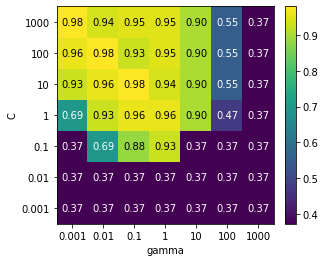

In [14]:
# 2. 검색 결과를 heatmap으로 시각화
# heatmap으로 시각화하려면 각 parameter를 축으로 하는 numpy 배열을 만들어야 함
# 7개의 grid(values)를 사용했으므로 cross-validation의 평균을 7x7 차원으로 변경
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar의 크기를 정하기 위한 축 library

plt.rcParams['axes.unicode_minus'] = False 

# 차원 변형
mean_score = results['mean_test_score'].values.reshape(7, 7)

# 시각화
score_image = mglearn.tools.heatmap(mean_score, 
                                    xlabel='gamma',
                                    xticklabels=param_grid['gamma'],
                                    ylabel='C',
                                    yticklabels=param_grid['C'])

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='5%')
plt.colorbar(score_image, cax=cax)
plt.show()

In [15]:
# heatmap의 각 포인트는 특정 parameter 설정에 대한 cross-validation 실행에 대응
# cross-validation의 정확도가 높을수록 밝은색으로, 낮을수록 어두운색으로 표현
# 다양한 색깔 포인트가 존재한다는 것은 그만큼 모델이 parameter 설정에 민감하다는 뜻

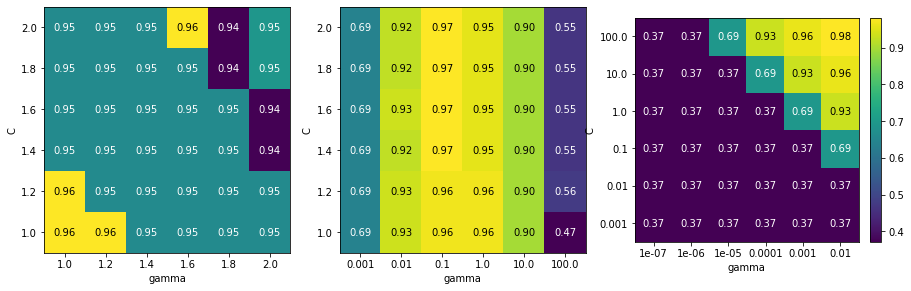

In [17]:
# 3. parameter가 적절히 선택되지 않은 경우
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar 조정하기 위한 그래프 축 library
import numpy as np

# subplots
_, axes = plt.subplots(1, 3, figsize=(15, 15))

# param_grid
param_grid_linear = {'C':np.linspace(1, 2, num=6),
                     'gamma': np.linspace(1, 2, num=6)}

param_grid_log = {'C':np.linspace(1, 2, num=6),
                  'gamma':np.logspace(-3, 2, num=6)}

param_grid_range = {'C':np.logspace(-3, 2, num=6), 
                    'gamma':np.logspace(-7, -2, num=6)}

# visualization
param_grid_sets = [param_grid_linear, param_grid_log, param_grid_range]    

for p, ax in zip(param_grid_sets, axes.ravel()):

    svc = SVC()

    kfold = KFold(n_splits=10, shuffle=True, random_state=0)

    grid_search = GridSearchCV(svc, param_grid=p, cv=kfold)
    grid_search.fit(x_train, y_train)
    
    mean_score = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    score_image = mglearn.tools.heatmap(mean_score, 
                                        xlabel='gamma',
                                        xticklabels=p['gamma'],
                                        ylabel='C', 
                                        yticklabels=p['C'], 
                                        ax=ax)

axis = plt.gca() # GetCurrentAxis
divider = make_axes_locatable(axis)
cax = divider.append_axes('right', size='5%', pad='5%')
plt.colorbar(score_image, ax=axes.tolist() ,cax=cax)
plt.show()

In [18]:
# 첫 번째 그래프는 점수 변화가 전혀 없어 parameter grid가 거의 같은 색
# -> parameter의 스케일 범위가 부적절할 때 발생

# 두 번째 그래프는 세로 띠 형태
# -> gamma만 정확도에 영향을 준다는 뜻

# 세 번째 그래프는 C와 gamma 모두 변했지만 왼쪽 아래는 변화가 없음
# -> 최적치가 그래프의 경계에 있으니 이 경계 너머에 더 좋은 값이 있다고 판단되고,
# -> 이 영역이 포함되도록 parameter 검색 범위를 바꿔야함

In [19]:
# 위에는 대칭적 파라미터(gamma가 6개, C가 6개)
# 이번에는 비대칭적 파라미터

# SVC에서 kernel='linear'이면 C만 사용
# SVC에서 kerner='rbf'이면 C, gamma 모두 사용

# 조건부 parameter의 조합을 적용하기 위해 param_grid를 딕셔너리 리스트로 만들어야 함
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
cancer_df_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [21]:
cancer_df_target = pd.DataFrame(cancer.target, columns=['target'])
cancer_df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
target    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB


In [24]:
# data partition
X_train, X_test, y_train, y_test =\
    train_test_split(cancer.data, 
                     cancer.target, 
                     random_state=0, 
                     test_size=0.3, 
                     stratify=cancer.target) # 지정한 Data의 비율을 유지한다. 
                                             # 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
                                             # stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

svc = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

values = [0.001, 0.01, 0.1, 1, 10, 100]
prarm_grid = {'C': values, 'gamma': values}
# param_grid = [
#                 {'kernel': ['rbf'], 'C': values, 'gamma': values}, # rbf 커널
#                 {'kernel': ['linear'], 'C': values}, # linear 커널
#                 {'kernel': ['poly'], 'C': values, 'gamma': values},
#              ]

grid_search = GridSearchCV(svc, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

print('optimal parameter ==> {}'.format(grid_search.best_params_))
print('optimal parameter score ==> {:.3f}'.format(grid_search.best_score_))
print('optimal parameter normal score ==> {:.3f}'.format(grid_search.score(X_test, y_test)))

optimal parameter ==> {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
optimal parameter score ==> 0.919
optimal parameter normal score ==> 0.906


In [25]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008193,0.000749,0.002199,3.988512e-04,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
1,0.006402,0.000786,0.001599,7.994893e-04,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
2,0.006250,0.007654,0.000000,0.000000e+00,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
3,0.012499,0.006250,0.000000,0.000000e+00,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
4,0.009375,0.007655,0.000000,0.000000e+00,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
5,0.006249,0.007654,0.003125,6.250668e-03,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
6,0.009374,0.007654,0.000000,0.000000e+00,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
7,0.009375,0.007654,0.000000,0.000000e+00,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
8,0.009374,0.007654,0.003125,6.249428e-03,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6
9,0.008416,0.004234,0.005124,5.269541e-03,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.6250,0.5250,0.6500,0.620253,0.721519,0.628354,0.063099,6


In [26]:
# nested cross-validation(중첩 교차 검증)
# GridSearchCV는 데이터를 train set과 test set으로 한 번만 나누기 때문에 결과가 불안정
# nested cross-validation은 바깥쪽 루프에서 데이터를 train set과 test set으로 나눈 여러 개의 fold를 만듦
# 각 fold의 train set에 대해 grid search를 실행, 바깥쪽 루프에서 분할된 fold의 train set마다 최적의 파라미터가 달라질 수 있음
# 바깥쪽에서 분할된 fold의 test set의 점수를 최적 파라미터 설정을 사용해 각각 측정

# 이 방법은 모델이나 파라미터 설정이 아니라 test 점수의 목록을 만들어주고,
# grid search를 통해 찾은 optimal parameter가 모델을 얼마나 잘 일반화하는지 알려줌
# 새로운 데이터에 적용할 모델을 만드는 것이 아니기에 미래의 데이터에 적용하기 위한 예측 모델을 찾을 때 사용하지 않음

# -> 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용

from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.svm import SVC

wine = load_wine()

values = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': values, 'gamma': values}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5) # 5회 교차 검증

scores = cross_val_score(grid_search,
                         wine.data,
                         wine.target, 
                         cv=5,
                         scoring='accuracy')
# cross_validate returns
# 1. test_score: 
# 2. train_score: 
# 3. fit_time: 
# 4. score_time:
# 5. estimator: 

# print(scores['test_score'])
# print(scores['train_score'])
# print(scores['fit_time'])
# print(scores['score_time'])
# print(scores['estimator'])
# print('\n')

target_names = ['Malignant', 'Benign']
print(classification_report(y_train[:50], y_test[:50], target_names=target_names))

              precision    recall  f1-score   support

   Malignant       0.39      0.65      0.49        17
      Benign       0.73      0.48      0.58        33

    accuracy                           0.54        50
   macro avg       0.56      0.57      0.54        50
weighted avg       0.61      0.54      0.55        50



In [27]:
# 여기에서 안쪽 루프와 바깥쪽 루프에 각각 stratified 5 cross-validation을 사용했고,
# param_grid의 매개변수 조합은 6x6 = 36이고, 이 때 만들어지는 모델은 36 x 5 x 5 = 900

In [29]:
import numpy as np

def nested_cv(x, y, inner_cv, outer_cv, Classifier, parameter_grid):

    outer_scores = []

    for train_samples, test_samples in outer_cv.split(x, y):
        best_params = {}
        best_score = -np.inf

        for parameters in parameter_grid:
            cv_scores = []

            for inner_train, inner_test in inner_cv.split(x[train_samples], y[train_samples]):

                clf = Classifier(**parameters) # **kwargs:
                clf.fit(x[inner_train], y[inner_train])

                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)

            mean_score = np.mean(cv_scores)

            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(x[train_samples], y[train_samples])
        
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))

    return np.array(outer_scores)

# library import
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(wine.data, wine.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수 ==> {}'.format(scores))
print('교차 검증 평균 점수 ==> {:.3f}'.format(scores.mean()))

교차 검증 점수 ==> [0.66666667 0.63888889 0.63888889 0.65714286 0.8       ]
교차 검증 평균 점수 ==> 0.680
